In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

### load Fashion MNIST

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


#### scale

In [25]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
class_names[y_train[0]]

'Coat'

#### build model

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
# or equally
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers

In [34]:
hidden1= model.layers[1]

In [37]:
hidden1.name

'dense_4'

In [38]:
model.get_layer('dense_4') is hidden1

True

In [39]:
weights, bias = hidden1.get_weights()

In [40]:
weights

array([[-0.04446562,  0.02592777,  0.05571538, ..., -0.03651243,
         0.0278038 ,  0.0059275 ],
       [-0.0258096 , -0.03765152,  0.0331723 , ..., -0.0116988 ,
         0.0438076 ,  0.04095044],
       [ 0.02151947, -0.02985584, -0.04396538, ..., -0.03190536,
         0.04551762, -0.01952185],
       ...,
       [ 0.07148166,  0.05623914,  0.01178235, ...,  0.06155381,
         0.02213906,  0.06057607],
       [ 0.03091582, -0.05131283,  0.03940973, ..., -0.01182939,
         0.01381756, -0.00469709],
       [ 0.06468558,  0.07431579,  0.06536172, ...,  0.07169144,
         0.03645357, -0.07078861]], dtype=float32)

In [41]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
weights.shape

(784, 300)

In [43]:
bias.shape

(300,)

#### compiling model

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### train

In [48]:
history = model.fit(x_train, y_train,
                   epochs=30,
                   validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.2769 - accuracy: 0.8997 - val_loss: 0.3126 - val_accuracy: 0.8870
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2724 - accuracy: 0.9012 - val_loss: 0.3061 - val_accuracy: 0.8930
Epoch 3/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2673 - accuracy: 0.9033 - val_loss: 0.3102 - val_accuracy: 0.8878
Epoch 4/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2627 - accuracy: 0.9049 - val_loss: 0.3081 - val_accuracy: 0.8900
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.2574 - accuracy: 0.9062 - val_loss: 0.2995 - val_accuracy: 0.8888
Epoch 6/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2526 - accuracy: 0.9084 - val_loss: 0.2997 - val_accuracy: 0.8904
Epoch 7/30
55000/55000 [===========================

#### visualize

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

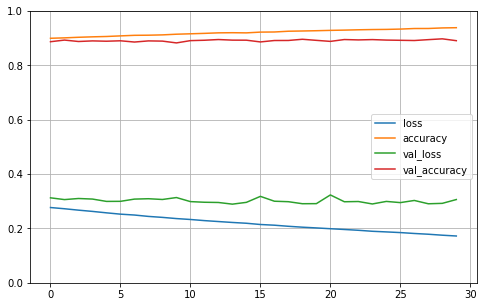

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [56]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[79.31008985900878, 0.8416]

In [62]:
x_new = x_test[:3]
y_proba = model.predict(x_new)

In [63]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred = model.predict_classes(x_new)

In [65]:
y_pred

array([9, 2, 1])

In [67]:
import numpy as np
np.array(class_names)

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [68]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')